In [7]:
# Enables/disables interactive visualization
interactive = False

from dipy.core.gradients import gradient_table
from dipy.data import get_fnames
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti, load_nifti_data

import numpy as np
import mpdenoise as mp
import matplotlib.pyplot as plt

# load example data
hardi_fname, hardi_bval_fname, hardi_bvec_fname = get_fnames('stanford_hardi')
label_fname = get_fnames('stanford_labels')

data, affine, img = load_nifti(hardi_fname, return_img=True)
labels = load_nifti_data(label_fname)
bvals, bvecs = read_bvals_bvecs(hardi_bval_fname, hardi_bvec_fname)
gtab = gradient_table(bvals, bvecs)


(81, 106, 76, 160)


  0%|          | 16/42930 [00:00<06:34, 108.84it/s]

Denoising data with parameters:
kernel     = [5 5 5]
patch type = nonlocal
patch size = 100
shrinkage  = frob
algorithm  = cordero-grande
coil level = False
rotation   = False
cropping   = 5 (0%)


100%|██████████| 42930/42930 [01:12<00:00, 589.55it/s]


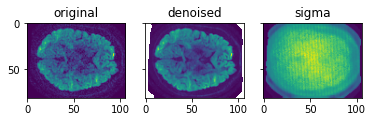

In [8]:
print(img.shape)
# run the denoising
imgdata = img.get_fdata()
imgslice = imgdata[:,:,30:35,:]
Signal, Sigma, Npars, _, _ = mp.denoise(imgslice, kernel=[5,5,5],patchtype='nonlocal',patchsize=100,shrinkage='frob',algorithm='cordero-grande')
f, ax = plt.subplots(1, 3, sharey=True)
ax[0].imshow(imgslice[:,:,3,20])
ax[0].set_title('original')
ax[1].imshow(Signal[:,:,3,20])
ax[1].set_title('denoised')
ax[2].imshow(Sigma[:,:,3])
ax[2].set_title('sigma')
plt.show()
